## Lab5 (поправена) Моделирање и симулација на комјутерски мрежи - Јана Николовска 171040

In [1]:
from networkx import nx
import numpy as np
import collections
import matplotlib.pyplot as plt
%matplotlib notebook

### SI модел

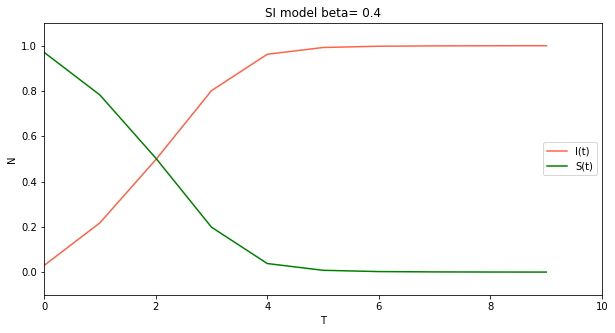

In [2]:
def si_model(G,beta,iterations):
    x = np.zeros((iterations,len(G.nodes))) #verojatnost da e zarazen
    adj_mat = nx.to_numpy_matrix(G)
    #k=np.random.randint(0, len(G.nodes)-1)
    k=0
    x[0][k]=1
    for t in range(1,iterations):
        for i in range(0,len(x[t])):
            x[t][i] = max(0, min(x[t-1][i] + beta * (1-x[t-1][i]) * x[t-1] * adj_mat[:,i],1))
             
    inf = np.sum(x,axis=1)/len(G.nodes)
    sus = 1 - inf
    
    figure = plt.figure(figsize=(10,5))
    plt.title("SI model beta= " +str(beta))

    inf_line, =plt.plot(inf, label='I(t)',color="tomato")
    sus_line, =plt.plot(sus, label='S(t)',color="green")

    plt.legend(handles=[inf_line,sus_line])
    plt.xlim(0,iterations)
    plt.ylim(-0.1,1.1)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    plt.xlabel('T')
    plt.ylabel('N')

    plt.show()
    
G = nx.karate_club_graph()
si_model(G,0.4,10)

*SI модел во кој после секоја итерација наместо податоци за веројатностите зачувуваме 1(заразен) или 0(здрав):

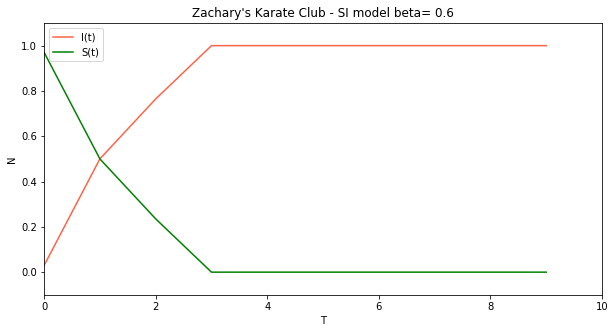

In [3]:
def si_model_sign(G,beta,iterations):
    x = np.zeros((iterations,len(G.nodes))) #verojatnost da e zarazen
    dx_dt = np.zeros((iterations,len(G.nodes)))
    adj_mat = nx.adjacency_matrix(G)
    #k=np.random.randint(0, len(G.nodes)-1)
    k=0
    x[0][k]=1
    for t in range(1,iterations):
        for i in range(0,len(x[t])):
            x[t][i] = np.where(x[t-1][i] + beta * (1-x[t-1][i]) * x[t-1] * adj_mat[:,i] > 0.5, 1 ,0)
              
    inf = np.sum(x,axis=1)/len(G.nodes)
    sus = 1 - inf
    
    figure = plt.figure(figsize=(10,5))
    plt.title(G.name + " - SI model beta= " + str(beta))

    inf_line, =plt.plot(inf, label='I(t)',color="tomato")
    sus_line, =plt.plot(sus, label='S(t)',color="green")

    plt.legend(handles=[inf_line,sus_line])
    plt.xlim(0,iterations)
    plt.ylim(-0.1,1.1)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    plt.xlabel('T')
    plt.ylabel('N')

    plt.show()
    

G = nx.karate_club_graph()
si_model_sign(G,0.6,10)


### SIS модел

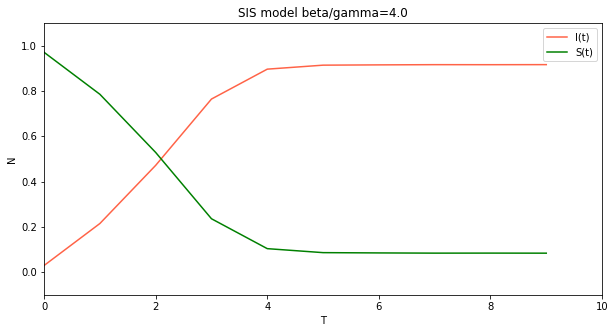

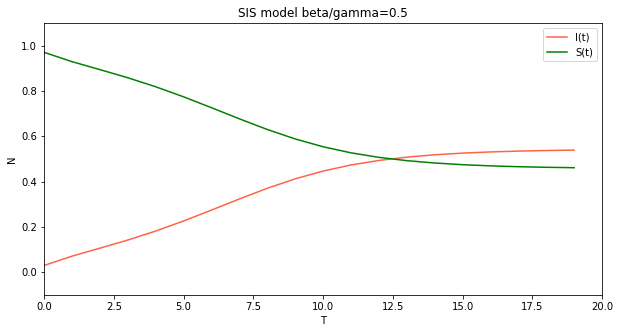

In [4]:
def sis_model(G,beta,gamma,iterations):
    x = np.zeros((iterations,len(G.nodes))) #verojatnost da e zarazen
    adj_mat = nx.to_numpy_matrix(G)
    #k=np.random.randint(0, len(G.nodes)-1)
    k=0
    x[0][k]=1
    for t in range(1,iterations):
        for i in range(0,len(x[t])):
            x[t][i] = max(0, min(x[t-1][i] + beta * (1-x[t-1][i]) * x[t-1] * adj_mat[:,i] - gamma * x[t-1][i],1))
             
    inf = np.sum(x,axis=1)/len(G.nodes)
    sus = 1 - inf
    
    figure = plt.figure(figsize=(10,5))
    plt.title("SIS model beta/gamma="+ str(round(beta/gamma,2)))

    inf_line, =plt.plot(inf, label='I(t)',color="tomato")
    sus_line, =plt.plot(sus, label='S(t)',color="green")

    plt.legend(handles=[inf_line,sus_line])
    plt.xlim(0,iterations)
    plt.ylim(-0.1,1.1)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    plt.xlabel('T')
    plt.ylabel('N')

    plt.show()
            
G = nx.karate_club_graph()
sis_model(G,0.4,0.1,10)
sis_model(G,0.1,0.2,20)

### SIR модел

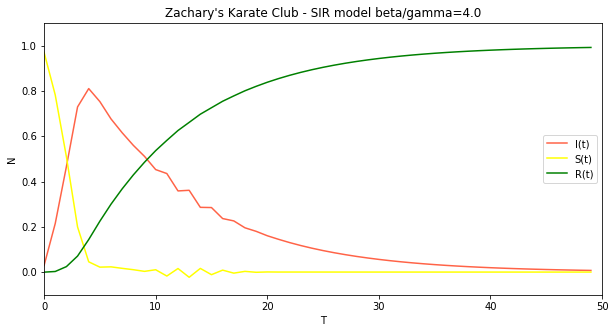

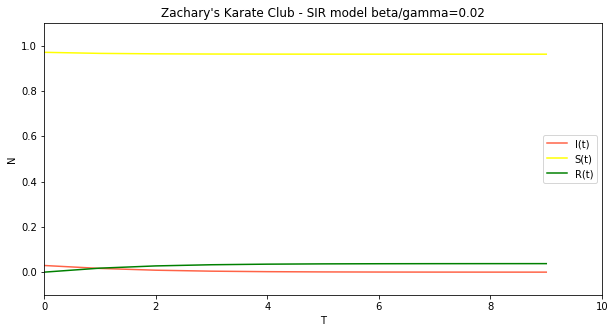

In [9]:
def sir_model(G,beta,gamma,iterations):
    x = np.zeros((iterations,len(G.nodes))) #verojatnost da e zarazen
    r = np.zeros((iterations,len(G.nodes)))
    adj_mat = nx.to_numpy_matrix(G)
    #k=np.random.randint(0, len(G.nodes)-1)
    k=0
    x[0][k]=1
    for t in range(1,iterations):
        for i in range(0,len(x[t])):
            x[t][i] = max(0, min(x[t-1][i] + beta * (1-x[t-1][i]-r[t-1][i]) * x[t-1] * adj_mat[:,i] - gamma * x[t-1][i],1))
            r[t][i] = max(0, min(r[t-1][i] + gamma * x[t-1][i],1))
    
    rec = np.sum(r,axis=1)/len(G.nodes)
    inf = np.sum(x,axis=1)/len(G.nodes)
    sus = 1 - inf - rec
    
    figure = plt.figure(figsize=(10,5))
    plt.title(G.name + " - SIR model beta/gamma="+ str(round(beta/gamma,2)))

    inf_line, = plt.plot(inf, label='I(t)',color="tomato")
    sus_line, = plt.plot(sus, label='S(t)',color="yellow")
    rec_line, = plt.plot(rec, label='R(t)',color="green")

    plt.legend(handles=[inf_line,sus_line,rec_line])
    plt.xlim(0,iterations)
    plt.ylim(-0.1,1.1)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    plt.xlabel('T')
    plt.ylabel('N')

    plt.show()
    
            
G = nx.karate_club_graph()
sir_model(G,0.4,0.1,50)
sir_model(G,0.01,0.6,10)

### Споредба на трите модели на Barabasi Albert Graph

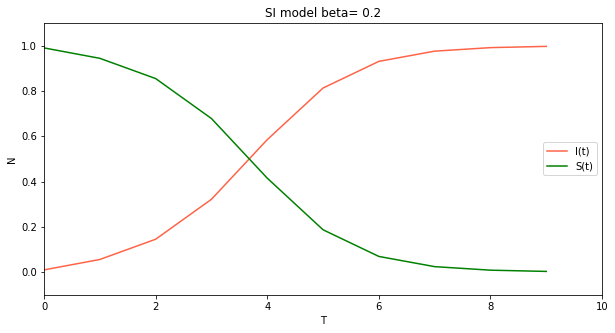

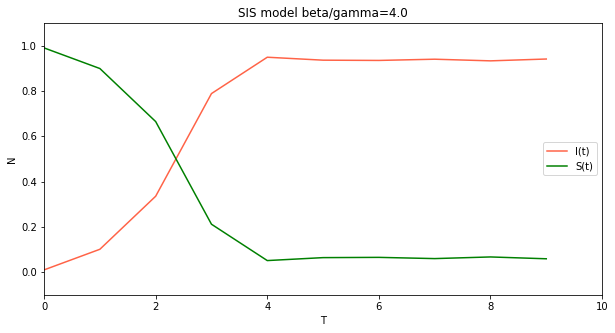

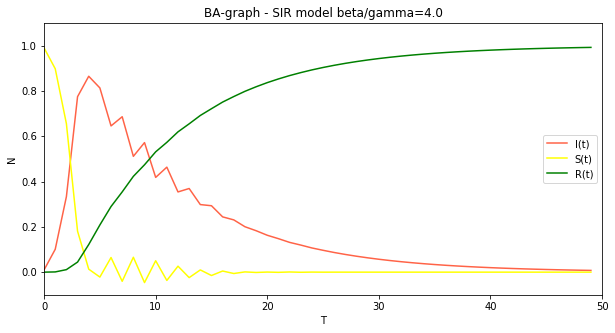

In [6]:
n=100
m=3
G=nx.barabasi_albert_graph(n, m, seed=None)
G.name="BA-graph"
si_model(G,0.2,10)
sis_model(G,0.4,0.1,10)
sir_model(G,0.4,0.1,50)